In [60]:
from ipywidgets  import interact,interactive,fixed
import ipywidgets  as widgets

### Using Interact

In [61]:
def fun(x):
    return x

In [62]:
interact(fun,x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.fun(x)>

In [63]:
def fun(x):
    return x**2

In [64]:
interact(fun,x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.fun(x)>

In [65]:
def fun(x):
    return x

In [66]:
interact(fun,x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.fun(x)>

In [67]:
def fun(x):
    return x

In [68]:
interact(fun,x='Hello')

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.fun(x)>

In [69]:
@interact(x=True,y=fixed(1.0))
def g(x,y):
    return (x,y)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [70]:
interact(fun,x=widgets.IntSlider(min=-10,max=30,step=1,value=0))

interactive(children=(IntSlider(value=0, description='x', max=30, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.fun(x)>

In [71]:
interact(fun,x=(0,8,2))

interactive(children=(IntSlider(value=4, description='x', max=8, step=2), Output()), _dom_classes=('widget-int…

<function __main__.fun(x)>

In [72]:
interact(fun, x=(0.0,10.0))

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

<function __main__.fun(x)>

In [73]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

In [74]:
interact(fun, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

In [75]:

interact(fun, x={'one': 10, 'two': 20});

interactive(children=(Dropdown(description='x', options={'one': 10, 'two': 20}, value=10), Output()), _dom_cla…

In [76]:
def f(x:True): 
    return x
interact(f)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x: True)>

### Using interactive

In [77]:
from IPython.display import display

In [78]:
def f(a, b):
    display(a + b)
    return a+b

In [79]:
w = interactive(f, a=10, b=20)
type(w)

ipywidgets.widgets.interaction.interactive

In [80]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [81]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [82]:
w.kwargs

{'a': 10, 'b': 20}

In [83]:
w.result

30

### Widget Basics

In [84]:
widgets.IntSlider()

IntSlider(value=0)

In [85]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [86]:
w.close()

In [87]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [88]:
w.value

0

In [89]:
w.value = 100
w.value

100

In [90]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'behavior',
 'continuous_update',
 'description',
 'description_allow_html',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'tabbable',
 'tooltip',
 'value']

In [91]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

### Linking two similar widgets

In [92]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [93]:
mylink.unlink()

### Widget Events

In [94]:
print(widgets.Button.on_click.__doc__)

Register a callback to execute when the button is clicked.

The callback will be called with one argument, the clicked button
widget instance.

Parameters
----------
remove: bool (optional)
    Set to true to remove the callback from the list of callbacks.



In [95]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

In [96]:
text = widgets.Text()
display(text)

def handle_submit(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print(text.value)

text.observe(handle_submit, names='value')

Text(value='')

In [97]:
print(widgets.Widget.observe.__doc__)

Setup a handler to be called when a trait changes.

This is used to setup dynamic notifications of trait changes.

Parameters
----------
handler : callable
    A callable that is called when a trait changes. Its
    signature should be ``handler(change)``, where ``change`` is a
    dictionary. The change dictionary at least holds a 'type' key.
    * ``type``: the type of notification.
    Other keys may be passed depending on the value of 'type'. In the
    case where type is 'change', we also have the following keys:
    * ``owner`` : the HasTraits instance
    * ``old`` : the old value of the modified trait attribute
    * ``new`` : the new value of the modified trait attribute
    * ``name`` : the name of the modified trait attribute.
names : list, str, All
    If names is All, the handler will apply to all traits.  If a list
    of str, handler will apply to all names in the list.  If a
    str, the handler will apply just to that name.
type : str, All (default: 'change')
    The t

In [98]:
int_range = widgets.IntSlider()
display(int_range)

def on_value_change(change):
    print(change['new'])

int_range.observe(on_value_change, names='value')

IntSlider(value=0)

### Linking Widgets

In [99]:
import traitlets

In [100]:
caption = widgets.Label(value = 'The values of slider1 and slider2 are synchronized')

slider1 = widgets.IntSlider(description='Slider 1')
slider2 =  widgets.IntSlider(description='Slider 2')

l = traitlets.link((slider1, 'value'), (slider2, 'value'))

display(caption, slider1, slider2)

Label(value='The values of slider1 and slider2 are synchronized')

IntSlider(value=0, description='Slider 1')

IntSlider(value=0, description='Slider 2')

In [101]:
caption = widgets.Label(value='Changes in source values are reflected in target1')

source = widgets.IntSlider(description='Source')
target1 = widgets.IntSlider(description='Target 1')

dl = traitlets.dlink((source, 'value'), (target1, 'value'))
display(caption, source, target1)

Label(value='Changes in source values are reflected in target1')

IntSlider(value=0, description='Source')

IntSlider(value=0, description='Target 1')

In [102]:
try:
    l.unlink()
except ValueError:
    print("Link already removed or was never created.")

In [103]:
caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

In [104]:
caption = widgets.Label(value = 'The values of range1 and range2 are synchronized')

range1 = widgets.IntSlider(description='Range 1')
range2 = widgets.IntSlider(description='Range 2')

l = widgets.jslink((range1, 'value'), (range2, 'value'))
display(caption, range1, range2)

Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=0, description='Range 1')

IntSlider(value=0, description='Range 2')

In [105]:
caption = widgets.Label(value = 'Changes in source_range values are reflected in target_range')

source_range = widgets.IntSlider(description='Source range')
target_range = widgets.IntSlider(description='Target range')

dl = widgets.jsdlink((source_range, 'value'), (target_range, 'value'))
display(caption, source_range, target_range)

Label(value='Changes in source_range values are reflected in target_range')

IntSlider(value=0, description='Source range')

IntSlider(value=0, description='Target range')

In [106]:
l.unlink()
dl.unlink()

In [107]:
import traitlets
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

traitlets.link((a, 'value'), (b, 'value'))
traitlets.link((a, 'value'), (c, 'value'))
traitlets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

### Widget Styling

In [108]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [109]:
w.layout.margin = 'auto'
w.layout.height = '75px'

In [110]:
x = widgets.IntSlider(value=15,description='New slider')
display(x)

IntSlider(value=15, description='New slider')

In [111]:
x.layout = w.layout

### Predefined styles

In [112]:
widgets.Button(description='Ordinary Button', button_style='')

Button(description='Ordinary Button', style=ButtonStyle())

In [113]:
widgets.Button(description='Danger Button', button_style='danger')

Button(button_style='danger', description='Danger Button', style=ButtonStyle())

In [114]:
b1 = widgets.Button(description='Custom color')
b1.style.button_color = 'lightgreen'
b1

Button(description='Custom color', style=ButtonStyle(button_color='lightgreen'))

In [115]:
b1.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'button_color',
 'font_family',
 'font_size',
 'font_style',
 'font_variant',
 'font_weight',
 'text_color',
 'text_decoration']

In [116]:
b2 = widgets.Button()
b2.style = b1.style
b2

Button(style=ButtonStyle(button_color='lightgreen'))

In [117]:
s1 = widgets.IntSlider(description='Blue handle')
s1.style.handle_color = 'lightblue'
s1

IntSlider(value=0, description='Blue handle', style=SliderStyle(handle_color='lightblue'))

### Custom Widget

In [119]:
%matplotlib inline
from IPython.display import clear_output, display, HTML
import numpy as np
from scipy import integrate

In [120]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [121]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N));

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t


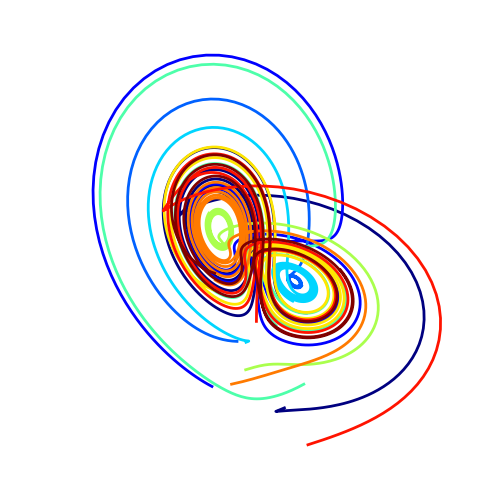

In [122]:
t, x_t = solve_lorenz(angle=0, N=10)

In [ ]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w);

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

In [124]:
t, x_t = w.result
w.kwargs

{'N': 10,
 'angle': 0.0,
 'max_time': 4.0,
 'sigma': 10.0,
 'beta': 2.6333333333333333,
 'rho': 28.0}

In [125]:
xyz_avg = x_t.mean(axis=1)
xyz_avg.shape

(10, 3)

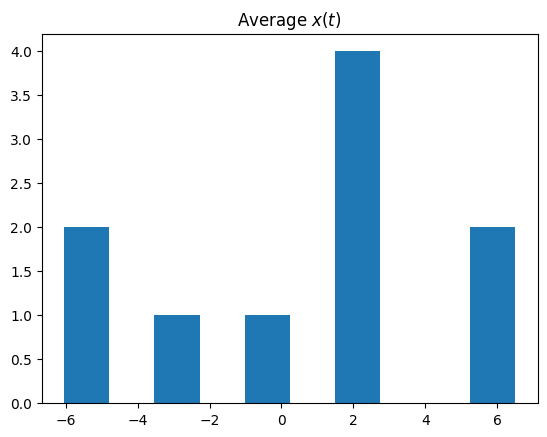

In [126]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

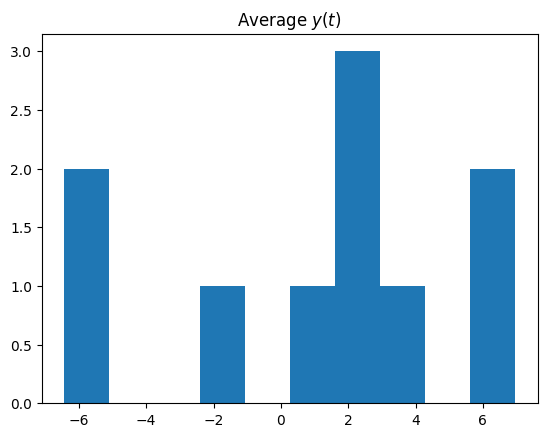

In [127]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');

### Advanced Widget List

In [128]:
out = widgets.Output()
out

Output()

In [129]:
with out:
    for i in range(10):
        print(i, 'Hello world!')

In [130]:
from IPython.display import YouTubeVideo
with out:
    display(YouTubeVideo('eWzY2nGfkXk'))

In [131]:
play = widgets.Play(
    # interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [132]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date', step=1)

In [133]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [134]:
widgets.Controller(
    index=0,
)

Controller()

In [135]:
items = [widgets.Label(str(i)) for i in range(4)]
widgets.Box(items)

Box(children=(Label(value='0'), Label(value='1'), Label(value='2'), Label(value='3')))

In [136]:
items = [widgets.Label(str(i)) for i in range(4)]
widgets.HBox(items)

In [137]:
items = [widgets.Label(str(i)) for i in range(4)]
left_box = widgets.VBox([items[0], items[1]])
right_box = widgets.VBox([items[2], items[3]])
widgets.HBox([left_box, right_box])

In [138]:
accordion = widgets.Accordion(children=[widgets.IntSlider(), widgets.Text()])
accordion.set_title(0, 'Slider')
accordion.set_title(1, 'Text')
accordion

Accordion(children=(IntSlider(value=0), Text(value='')), titles=('Slider', 'Text'))

In [139]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(i))
tab

In [140]:
tab.selected_index = 3
accordion.selected_index = None

In [141]:
tab_nest = widgets.Tab()
tab_nest.children = [accordion, accordion]
tab_nest.set_title(0, 'An accordion')
tab_nest.set_title(1, 'Copy of the accordion')
tab_nest